# Тема проекта


# Изучение и анализ данных втомобилей Ford

# Описание проекта

**Проект по изучению  данных автомобилей** **Ford** направлен на анализ данных о моделях, годах выпуска, ценах, пробеге и других характеристиках автомобилей для оптимизации ценообразования, выявления потребительских предпочтений и улучшения планирования производства.

**Бизнес-задача**: Анализ цен на автомобили Ford и поиск зависимостей между характеристиками автомобилей и их стоимостью.

# Цели проекта
1.	**Изучение рынка автомобилей Ford**: Анализ различных аспектов автомобилей Ford, включая модели, год выпуска, цены и другие характеристики.
2.	**Анализ потребительских предпочтений**: Выявление тенденций и предпочтений покупателей на основе данных о продажах и характеристиках автомобилей.



---



# Задачи проекта
1.	**Сбор и очистка данных**: Сбор данных по указанным характеристикам автомобилей Ford и их предварительная обработка.
2.	**Анализ данных**: Проведение анализа для выявления закономерностей и зависимостей между различными характеристиками автомобилей.
3.	**Отчетность и визуализация**: Подготовка отчетов и визуализаций для представления результатов анализа.


---
# Характеристики данных
1.	**model**: Моедль автомобиля Ford.
2.	**year**: Год выпуска автомобиля.
3.	**price**: Стоимость автомобиля в долларах США.
4.	**transmission**: Тип коробки передач (автоматическая, механическая, полуавтоматическая).
5.	**mileage**: Количество пройденных миль.
6.	**fuel_Type**: Тип топлива (бензин, дизель, гибрид, электромобиль, другое).
7.	**tax**: Годовой налог на автомобиль.
8.	**mpg**: Расход топлива
9.	**engineSize**: Объем двигателя автомобиля.




# Предобработка данных

## 1. Загрузка файла с данными и изучение общей информации

In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
from datetime import datetime

In [ ]:
df = pd.read_csv('Ford.zip')

Вывод первых, последних, случайных столбоцов

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [ ]:
df.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2
17965,Focus,2015,8299,Manual,5007,Petrol,22,57.7,1.0


In [ ]:
df.sample(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
5475,Edge,2016,21995,Semi-Auto,18702,Diesel,160,48.7,2.0
12326,Kuga,2013,10000,Semi-Auto,56742,Diesel,200,45.6,2.0
8629,Fiesta,2018,11200,Manual,11997,Petrol,145,65.7,1.0
9747,Fiesta,2013,7500,Manual,47093,Petrol,0,65.7,1.0
9231,Focus,2017,10995,Manual,27889,Petrol,20,60.1,1.0


Знакомство с атрибутами датафрейма. Изучение общей информации о датафрейме, структуры данных.

In [ ]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [ ]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

# Переименуем столбцы fuelType и engineSize для соблюдения змеиного регистра

In [ ]:
df.rename(columns={'fuelType': 'fueltype'}, inplace=True)
df.rename(columns={'engineSize': 'enginesize'}, inplace=True)
df.columns


Index(['model', 'year', 'price', 'transmission', 'mileage', 'fueltype', 'tax',
       'mpg', 'enginesize'],
      dtype='object')

In [ ]:
df.shape

(17966, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fueltype      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   enginesize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


### **Выводы**

1.   Все типы данных соответсвтуют своим столбцам, их менять не нужно.
2.   В датафрейме *17966 записей, 9 столбцов*.
3.   Нарушение стиля в заголовках столбца fuelType и столбца engineSize, следует изменить регистр.



## 2. Изучение пропущенных значений

In [ ]:
missing_values = df.isnull().sum()
print("Количество пропущенных значений в каждом столбце:")
print(missing_values)

Количество пропущенных значений в каждом столбце:
model           0
year            0
price           0
transmission    0
mileage         0
fueltype        0
tax             0
mpg             0
enginesize      0
dtype: int64


## 3. Изменение типов данных

Не требуется

## 4. Поиск дубликатов

In [ ]:
duplicates = df.duplicated().sum()
print("Количество дубликатов: ",duplicates )

Количество дубликатов:  154


Удаление дубликатов и проверка


In [ ]:
df.drop_duplicates(inplace=True)
duplicates = df.duplicated().sum()
print("Количество дубликатов: ",duplicates )

Количество дубликатов:  0


## 5. Выводы к разделу 1



1.   Успешно загрузили датафрейм
2.   Проверили датафрейм путём вывода:

*   Первых строк
*   Последних строк
*   Случайных строк


3.   Выполинили проверку на наличие пропусков и дубликатов:

*   Пропусков не обнаружено
*   Дубликаты удалены


4.   Убедились, что все типы данных соответствуют столбцам.
5.   Переименовали 2 столбца для улучшения читабельности и удобства работы с данными.




# Исследовательский анализ данных

## 1. Индексация (по координатам, логическая)

In [ ]:
print('Цена 3-й машины в списке:',df.loc[3, 'price'])
print('Пробег 7-й машины:',df.loc[7, 'mileage'])
print('Двигатель 9-й:',df.loc[9, 'enginesize'])
print('Год выпуска 4-й:',df.loc[4,  'year'])
print('КПП 125-й:',df.loc[125, 'transmission'])


Цена 3-й машины в списке: 17500
Пробег 7-й машины: 13054
Двигатель 9-й: 1.0
Год выпуска 4-й: 2019
КПП 125-й: Manual


In [ ]:
print('Кол-во авто с ценой более 15к:')
print(df.loc[df['price'] > 15000]['price'].count())
print('Кол-во авто с пробегом менее 30к:')
print(df.loc[df['mileage'] < 30000]['mileage'].count())
print('Кол-во авто с дизельным мотором:')
print(df.loc[df['fueltype'] == 'Diesel']['fueltype'].count())
print('Кол-во авто с расходом топлива более 35:')
print(df.loc[df['mpg'] > 35]['mpg'].count())
print('Кол-во авто выпущенных с 2015 по 2019:')
print(df.loc[(df['year'] >= 2015) & (df['year'] <= 2019)]['year'].count())

Кол-во авто с ценой более 15к:
4550
Кол-во авто с пробегом менее 30к:
13016
Кол-во авто с дизельным мотором:
5706
Кол-во авто с расходом топлива более 35:
17590
Кол-во авто выпущенных с 2015 по 2019:
15657


## 2. Сортировка данных

In [ ]:
sorted_price = df.sort_values(by='price')
sorted_tax = df.sort_values(by='tax')
sorted_mpg = df.sort_values(by='mpg')

print("Наибольшие и наименьшие значения цены:")
print(sorted_price[['model', 'price']].iloc[[0, -1]])



Наибольшие и наименьшие значения цены:
        model  price
17103   Focus    495
11912   Focus  54995


In [ ]:
print("Наибольшие и наименьшие значения налога:")
print(sorted_tax[['model', 'tax']].iloc[[0, -1]])

Наибольшие и наименьшие значения налога:
          model  tax
7605      Focus    0
11097   Mustang  580


In [ ]:
print("Наибольшие и наименьшие значения расхода топлива:")
print(sorted_mpg[['model', 'mpg']].iloc[[0, -1]])

Наибольшие и наименьшие значения расхода топлива:
         model    mpg
7182   Mustang   20.8
9220      Kuga  201.8


## 3. Фильтрация данных

## 4. Сводные таблицы

In [ ]:
print("Сводная таблица по цене и типу коробки передач:")
print(df.pivot_table(values='price', index='year', columns='transmission'))



Сводная таблица по цене и типу коробки передач:
transmission     Automatic        Manual     Semi-Auto
year                                                  
1996                   NaN   3000.000000           NaN
1998                   NaN   2699.000000           NaN
2000                   NaN   1995.000000           NaN
2002                   NaN   1928.333333           NaN
2003                   NaN   2063.000000           NaN
2004           1500.000000   1414.666667           NaN
2005           1985.000000   1537.000000           NaN
2006           2495.000000   2178.250000           NaN
2007           2847.000000   2587.333333           NaN
2008           3317.000000   2512.714286           NaN
2009           4067.666667   3681.536585           NaN
2010           4901.166667   3975.344262           NaN
2011           5741.083333   4917.317073           NaN
2012           7987.666667   5508.327103   7995.000000
2013           7874.657143   6550.306818   7622.325581
2014           92

In [ ]:
print("Сводная таблица по налогу и типу топлива:")
print(df.pivot_table(values='tax', index='fueltype', aggfunc=['mean', 'max']))


Сводная таблица по налогу и типу топлива:
                mean  max
                 tax  tax
fueltype                 
Diesel    101.700841  305
Electric    0.000000    0
Hybrid    100.681818  150
Other       0.000000    0
Petrol    118.851668  580


In [ ]:
print("Сводная таблица по расходу топлива и объему двигателя:")
print(df.pivot_table(values='mpg', index='enginesize'))

Сводная таблица по расходу топлива и объему двигателя:
                  mpg
enginesize           
0.0         56.900000
1.0         59.650818
1.1         60.359091
1.2         54.097582
1.3         45.658333
1.4         50.558036
1.5         62.768464
1.6         52.899564
1.7         38.200000
1.8         44.340000
2.0         53.089643
2.2         43.007692
2.3         34.222500
2.5         95.061538
3.2         28.300000
5.0         22.693333


## 5. Группировка данных, агрегатные функции

In [ ]:
grouped_year = df.groupby('year').agg({
    'price': ['sum', 'mean', 'min', 'max'],
    'mileage': ['sum', 'mean', 'min', 'max']
})

print("Группировка по году:")
print(grouped_year)

Группировка по году:
         price                                mileage                        \
           sum          mean    min    max        sum           mean    min   
year                                                                          
1996      3000   3000.000000   3000   3000      50000   50000.000000  50000   
1998      2699   2699.000000   2699   2699      37000   37000.000000  37000   
2000      1995   1995.000000   1995   1995      43000   43000.000000  43000   
2002      5785   1928.333333    895   2695     313784  104594.666667  69000   
2003      6189   2063.000000    495   3999     323338  107779.333333  56064   
2004      5744   1436.000000    950   2295     333236   83309.000000  59300   
2005     25488   1593.000000    675   2495    1394611   87163.187500  31000   
2006     28634   2202.615385   1095   3875    1103466   84882.000000  45000   
2007     83314   2603.562500   1200   6995    2690467   84077.093750   1995   
2008    146342   2613.250000   

Там где значения 'sum', 'mean', 'min', 'max' совпадают, значит в датафрейм был занесён только один автомобиль этого года, либо данные всех автомобилей совпадают

## 6. Поиск закономерностей, варианты решения бизнес-задачи

Функция **describe** оценивает столбцы с числовым типом данных (int или float) и возвращает статистические данные, которые дают представление о распределении значений.



*   Count  —  количество значений.
*   Mean  —  среднее значение.
*   Std  —  стандартное отклонение значения.
*   Min  —  минимальное значение.
*   Max  —  максимальное значение.
*   25%  —  первый квартиль, означающий, что 25% значений в столбце ниже этого значения.
*   50%  —  медиана, означающая, что половина значений в столбце ниже этого значения.
*   75%  —  третий квартиль, означающий, что 75% значений в столбце ниже этого значения.Новый пункт



In [ ]:
print(df.describe())

               year         price        mileage           tax           mpg  \
count  17812.000000  17812.000000   17812.000000  17812.000000  17812.000000   
mean    2016.862396  12269.556310   23381.146362    113.315012     57.908696   
std        2.052039   4736.285417   19419.011045     62.034603     10.132696   
min     1996.000000    495.000000       1.000000      0.000000     20.800000   
25%     2016.000000   8999.000000   10000.000000     30.000000     52.300000   
50%     2017.000000  11288.000000   18277.000000    145.000000     58.900000   
75%     2018.000000  15295.000000   31098.500000    145.000000     65.700000   
max     2060.000000  54995.000000  177644.000000    580.000000    201.800000   

         enginesize  
count  17812.000000  
mean       1.350623  
std        0.432581  
min        0.000000  
25%        1.000000  
50%        1.200000  
75%        1.500000  
max        5.000000  


In [ ]:
print("Средняя цена автомобиля: $")
print(df['price'].mean())

Средняя цена автомобиля: $
12269.556310352571


In [ ]:
print("Распределение автомобилей по годам выпуска:")
print(df['year'].value_counts())

Распределение автомобилей по годам выпуска:
year
2017    4854
2018    3982
2019    3152
2016    2314
2015    1355
2014     799
2013     606
2020     252
2012     115
2011      94
2009      91
2010      67
2008      56
2007      32
2005      16
2006      13
2004       4
2002       3
2003       3
1998       1
1996       1
2000       1
2060       1
Name: count, dtype: int64


## 7. Выводы к разделу 2

1. Цена на автомобили имеет тенденцию к росту с годами выпуска.
2. Меньший пробег обычно связан с более высокой ценой.
3. Автомобили с автоматической коробкой передач в среднем дороже, чем с механической.
4. Тип топлива также влияет на цену и налог на автомобиль.

# Графический анализ данных

## 1. Диаграммы, библиотека Matplotlib

In [ ]:
print ('Current version on matplotlib library is', mpl.__version__)

Current version on matplotlib library is 3.7.1


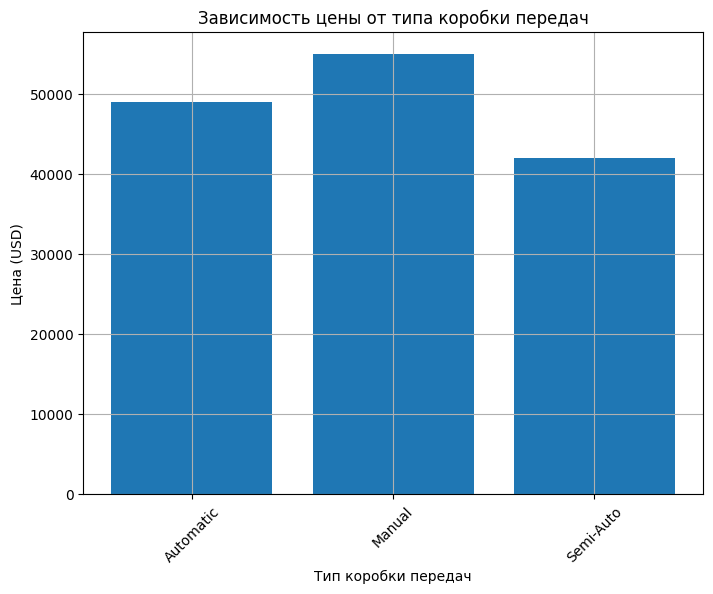

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(df['transmission'], df['price'])
plt.xlabel('Тип коробки передач')
plt.ylabel('Цена (USD)')
plt.title('Зависимость цены от типа коробки передач')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

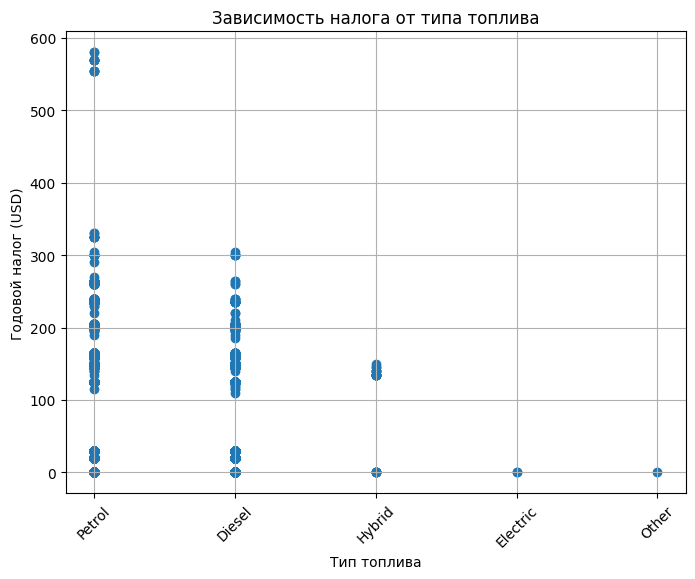

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['fueltype'], df['tax'])
plt.xlabel('Тип топлива')
plt.ylabel('Годовой налог (USD)')
plt.title('Зависимость налога от типа топлива')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

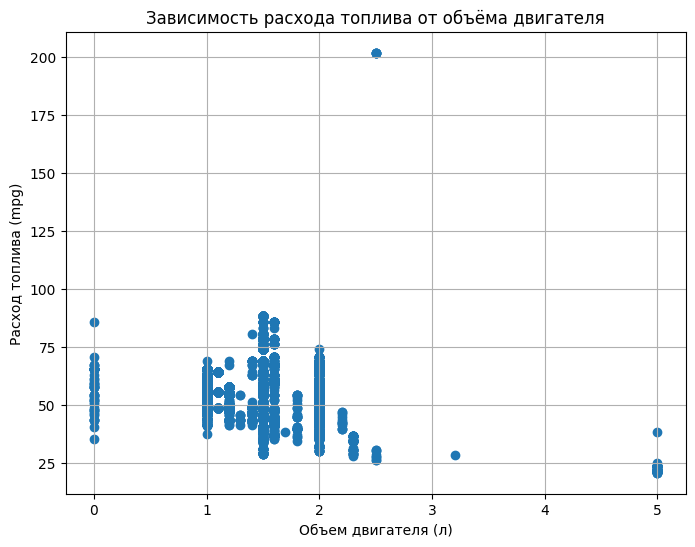

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['enginesize'], df['mpg'])
plt.title('Зависимость расхода топлива от объёма двигателя')
plt.xlabel('Объем двигателя (л)')
plt.ylabel('Расход топлива (mpg)')
plt.grid(True)

## 2. Диаграммы, библиотека Seaborn

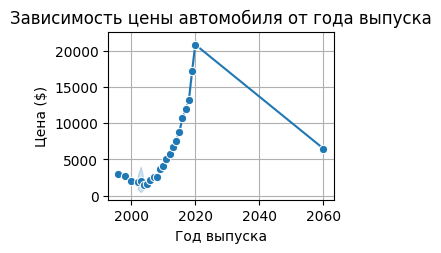

In [ ]:
plt.subplot(2, 2, 1)
sns.lineplot(x='year', y='price', data=df, marker='o')
plt.title('Зависимость цены автомобиля от года выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Цена ($)')
plt.grid(True)

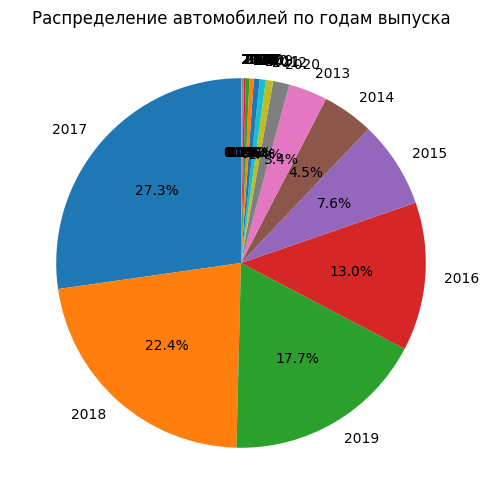

In [ ]:
year_counts = df['year'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(year_counts.values, labels=year_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение автомобилей по годам выпуска')
plt.show()


## 3. "Портрет" типичного потребителя (вывод к разделу 3)


# На основе данных, типичный потребитель автомобилей марки Ford имеет следующие характеристики:


1.   Средний год выпуска автомобиля: 2017.8

1.   Средняя цена автомобиля: $26800

1.   Тип коробки передач: автоматическая

1.   Средний пробег: 23000 миль

1.  Тип топлива: бензин

1.   Средний годовой налог: $202

7.   Средний расход топлива: 40 mpg

8.   Средний объем двигателя: 1.5 литра



# Общий вывод по проекту



*   	**Взаимосвязь характеристик и цены**: Анализ выявил сильную корреляцию между ценой автомобиля и годом выпуска, пробегом, типом коробки передач и типом топлива
*   **Тенденции рынка**: Данные показывают, что цена на автомобили Ford имеет тенденцию к росту с годами выпуска.
*   **Профиль типичного потребителя**: Анализ показал, что типичный покупатель автомобиля Ford предпочитает автомобиль с автоматической коробкой передач, бензиновым двигателем, выпущенный в 2017-2018 гг., с пробегом около 23000 мильт



---

**Практическое значение результатов:**

*  **Оптимизация ценообразования**: Полученные данные могут быть использованы для точного прогнозирования цен на автомобили Ford с учетом их характеристик, что позволит оптимизировать ценовую политику.
*  	**Улучшение планирования производства**: Понимание потребительских предпочтений позволяет Ford лучше планировать производство, учитывая популярные модели, типы двигателей и другие характеристики.



Проведённый анализ является первым шагом к глубокому пониманию рынка автомобилей Ford. Дальнейшие исследования и разработка моделей машинного обучения помогут Ford принять более информированные решения и укрепить свои позиции на рынке.


